In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from opendp.mod import binary_search, binary_search_param, enable_features

from tools import *

enable_features('contrib')
enable_features('floating-point')

In [ ]:
def squared_loss(theta, x, y):
    n = len(x)
    return (1 / n) * np.sum((theta * x - y) ** 2)

def d_squared_loss(theta, x, y):
    n = len(x)
    return (2 / n) * np.sum((theta * x - y) * x)

def calc_lipschitz_coeff(x, y):
    return np.linalg.norm(x) ** 2 + np.linalg.norm(x) * np.linalg.norm(y)

def dp_lasso_regression(x, y, epsilon, delta = 10. ** (-5), T=100, bounds=(-1., 1.), C_1=1., L_1=10., dim=1):
    assert(len(x) == len(y))
    n = len(x)
    # Dealing only with simple, 1D case
    if dim != 1:
        print("Data is not 1D")
        return 
    # L_1 = calc_lipschitz_coeff(x, y)
    theta = np.random.choice(bounds)
    s1, s2 = bounds
    noise_scale = (L_1 * C_1 * np.sqrt(8 * T * np.log(1./delta))) / (n * epsilon)
    for t in range(T):
        # as we are in the 1D case, there are only two points in the hull to consider: the bounds
        loss_1 = s1 * d_squared_loss(theta, x, y) + laplace(scale=noise_scale)
        loss_2 = s2 * d_squared_loss(theta, x, y) + laplace(scale=noise_scale)
        choice = s1
        if loss_2 < loss_1:
            choice = s2
        mu_t = 2 / (t+2)
        theta = (1-mu_t)*theta + mu_t*choice
    return theta
        


In [ ]:
epsilon, delta = 1., 10. ** (-5)
trials = 100

# change true from OLS to lasso too?
true_sd, true_bias, dp_sd, dp_bias = [], [], [], []

for n in range(100, 5001, 100):
    slope = -1.
    true_ols, dp_ols = [], []
    for _ in range(trials):
        x = np.random.uniform(-1., 1., n)
        y = clamp(slope * x + np.random.normal(loc=0., scale=0.02, size=n), (-1, 1))
        true_ols.append(ols_regression(x, y))
        dp_ols.append(dp_lasso_regression(x, y, epsilon, delta))
    true_sd.append(np.std(true_ols))
    true_bias.append(np.mean(true_ols) - slope)
    dp_sd.append(np.std(dp_ols))
    dp_bias.append(np.mean(dp_ols) - slope)

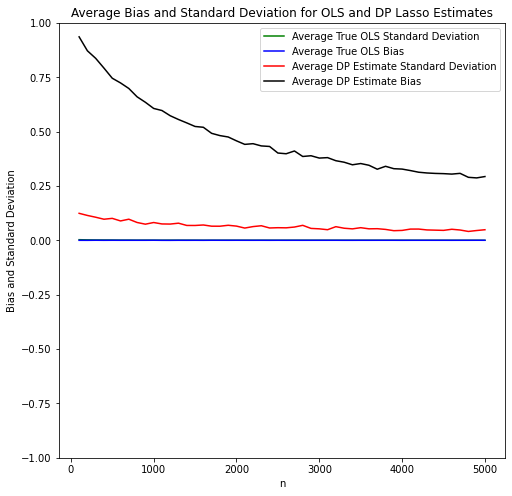

In [ ]:
plot_true_sd = clamp(true_sd, (-1, 1))
plot_true_bias = clamp(true_bias, (-1, 1))
plot_dp_sd = clamp(dp_sd, (-1, 1))
plot_dp_bias = clamp(dp_bias, (-1, 1))

plt.figure(figsize=(8, 8))

plt.plot(list(range(100, 5001, 100)), plot_true_sd, color="green", label="Average True OLS Standard Deviation")
plt.plot(list(range(100, 5001, 100)), plot_true_bias, color="blue", label="Average True OLS Bias")
plt.plot(list(range(100, 5001, 100)), plot_dp_sd, color="red", label="Average DP Estimate Standard Deviation")
plt.plot(list(range(100, 5001, 100)), plot_dp_bias, color="black", label="Average DP Estimate Bias")

plt.xlabel("n")
plt.ylim(-1, 1)
plt.ylabel("Bias and Standard Deviation")
plt.title("Average Bias and Standard Deviation for OLS and DP Lasso Estimates")
plt.legend()
plt.show()

In [ ]:
x = np.random.uniform(-0.5, 0.5, 100)
y = clamp(slope * x + np.random.normal(loc=0., scale=0.02, size=100), (-1, 1))
print(np.transpose(x) @ x)
print(np.transpose(x) @ y)

7.455741756729897
-7.401253700420707


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=832efdeb-c711-407d-8765-740a54374b1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>